## Change image colour through YUV space

In [40]:
import random
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

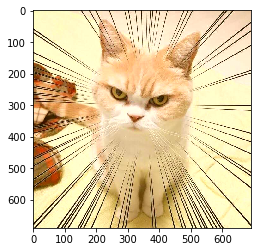

In [61]:
def random_light_color(img):
    """Change color through YUV space."""
    Y, U, V = cv.split(cv.cvtColor(img, cv.COLOR_BGR2YUV))
    
    for i in [Y, U, V]:
        rand = random.randint(-40, 40)
        if rand == 0:
            pass
        elif rand > 0:
            lim = 255 - rand
            i[i>lim] = 255
            i[i<=lim] = (rand + i[i<=lim]).astype(img.dtype)
        else:
            lim = 0 - rand
            i[i<lim] = 0
            i[i>=lim] = (rand + i[i>=lim]).astype(img.dtype)
    img_merge = cv.merge((Y, U, V))
    return img_merge

img = cv.imread('data/cat.jpg')
img_yuv = random_light_color(img)

img_rgb = cv.cvtColor(img_yuv, cv.COLOR_YUV2RGB)
plt.imshow(img_rgb)

## YUV Color Space

[YUV](https://en.wikipedia.org/wiki/YUV) is a color encoding system typically used as part of a color image pipeline. It encodes a color image or video taking human perception into account, allowing reduced bandwidth for chrominance components, thereby typically enabling transmission errors or compression artifacts to be more efficiently masked by the human perception than using a "direct" RGB-representation. Other color encodings have similar properties, and the main reason to implement or investigate properties of Y′UV would be for interfacing with analog or digital television or photographic equipment that conforms to certain Y′UV standards.

The scope of the terms Y′UV, YUV, YCbCr, YPbPr, etc., is sometimes ambiguous and overlapping. Historically, the terms YUV and Y′UV were used for a specific analog encoding of color information in television systems, while YCbCr was used for digital encoding of color information suited for video and still-image compression and transmission such as MPEG and JPEG. Today, the term YUV is commonly used in the computer industry to describe file-formats that are encoded using YCbCr.

Y′ stands for the luma component (the brightness) and U and V are the chrominance (color) components; luminance is denoted by Y and luma by Y′ – the prime symbols (') denote gamma compression,[1] with "luminance" meaning physical linear-space brightness, while "luma" is (nonlinear) perceptual brightness.

Y′UV signals are typically created from RGB (red, green and blue) source. Weighted values of R, G, and B are summed to produce Y′, a measure of overall brightness or luminance. U and V are computed as scaled differences between Y′ and the B and R values.

BT.601 defines the following constants:

\begin{aligned}W_{R}&=0.299,\\W_{G}&=1-W_{R}-W_{B}=0.587,\\W_{B}&=0.114,\\U_{\text{max}}&=0.436,\\V_{\text{max}}&=0.615.\end{aligned}



Y′UV is computed from RGB (linear RGB, not gamma corrected RGB or sRGB for example) as follows:

\begin{aligned}Y'&=W_{R}R+W_{G}G+W_{B}B=0.299R+0.587G+0.114B,\\U&=U_{\text{max}}{\frac {B-Y'}{1-W_{B}}}\approx 0.492(B-Y'),\\V&=V_{\text{max}}{\frac {R-Y'}{1-W_{R}}}\approx 0.877(R-Y').\end{aligned}
The resulting ranges of Y′, U, and V respectively are [0, 1], [−Umax, Umax], and [−Vmax, Vmax].

Inverting the above transformation converts Y′UV to RGB:

\begin{aligned}R&=Y'+V{\frac {1-W_{R}}{V_{\text{max}}}}=Y'+{\frac {V}{0.877}}=Y'+1.14V,\\G&=Y'-U{\frac {W_{B}(1-W_{B})}{U_{\text{max}}W_{G}}}-V{\frac {W_{R}(1-W_{R})}{V_{\text{max}}W_{G}}}\\&=Y'-{\frac {0.232U}{0.587}}-{\frac {0.341V}{0.587}}=Y'-0.395U-0.581V,\\B&=Y'+U{\frac {1-W_{B}}{U_{\text{max}}}}=Y'+{\frac {U}{0.492}}=Y'+2.033U.\end{aligned}

Equivalently, substituting values for the constants and expressing them as matrices gives these formulas for BT.601:

\begin{aligned}{\begin{bmatrix}Y'\\U\\V\end{bmatrix}}&={\begin{bmatrix}0.299&0.587&0.114\\-0.14713&-0.28886&0.436\\0.615&-0.51499&-0.10001\end{bmatrix}}{\begin{bmatrix}R\\G\\B\end{bmatrix}},\\{\begin{bmatrix}R\\G\\B\end{bmatrix}}&={\begin{bmatrix}1&0&1.13983\\1&-0.39465&-0.58060\\1&2.03211&0\end{bmatrix}}{\begin{bmatrix}Y'\\U\\V\end{bmatrix}}.\end{aligned}


For HDTV the ATSC decided to change the basic values for WR and WB compared to the previously selected values in the SDTV system. For HDTV these values are provided by Rec. 709.

BT.709 defines these weight values:

\begin{aligned}W_{R}&=0.2126\\W_{B}&=0.0722\\\end{aligned}



The conversion matrices & formulas for BT.709 are these:

\begin{aligned}{\begin{bmatrix}Y'\\U\\V\end{bmatrix}}&={\begin{bmatrix}0.2126&0.7152&0.0722\\-0.09991&-0.33609&0.436\\0.615&-0.55861&-0.05639\end{bmatrix}}{\begin{bmatrix}R\\G\\B\end{bmatrix}}\\{\begin{bmatrix}R\\G\\B\end{bmatrix}}&={\begin{bmatrix}1&0&1.28033\\1&-0.21482&-0.38059\\1&2.12798&0\end{bmatrix}}{\begin{bmatrix}Y'\\U\\V\end{bmatrix}}\end{aligned}